In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import os
import platform
import sys

In [3]:
#  Setting Path to Dataset
def check_if_colab():
    if 'google.colab' in sys.modules:
        return True
    return False

In [4]:
if check_if_colab():
    print("Running on Google Colab")
    # from google.colab import drive
    # drive.mount('/content/drive')
    # BASE_PATH_TO_DATASETS='/content/drive/MyDrive/OMSCS/cs7641/All assignments/Assignments/Assignment-1'
    # BASE_PATH_TO_DATASETS=os.path.join(BASE_PATH_TO_DATASETS,'pubg')
else:
  if platform.system().lower().__contains__('windows'):
      BASE_PATH_TO_PROJECT_REPOSITORY=(os.sep).join(os.getcwd().split(os.sep)[:os.getcwd().split(os.sep).index('Parsec_Assignment')+1])
      BASE_PATH_TO_DATASETS=os.path.join(BASE_PATH_TO_PROJECT_REPOSITORY,'dataset')
      BASE_PATH_TO_CODE_BASE =os.path.join(BASE_PATH_TO_DATASETS, 'code_base')

  elif platform.system().lower().__contains__('linux'):
      BASE_PATH_TO_PROJECT_REPOSITORY=(os.sep).join(os.getcwd().split(os.sep)[:os.getcwd().split(os.sep).index('Parsec_Assignment')+1])
      BASE_PATH_TO_DATASETS=os.path.join(BASE_PATH_TO_PROJECT_REPOSITORY,'dataset')
      BASE_PATH_TO_CODE_BASE=os.path.join(BASE_PATH_TO_PROJECT_REPOSITORY, 'code_base')
  else:
      print('OS Error')
os.listdir(BASE_PATH_TO_DATASETS)

['DataSet.xlsx',
 'modified_dataset.xlsx',
 'modified_dataset_v1.xlsx',
 'modified_dataset_v2.xlsx',
 'modified_dataset_v3.xlsx',
 'modified_testing_df.csv',
 'modified_training_df.csv']

#### Loading Dataset

In [5]:
training_data = pd.read_csv(os.path.join(BASE_PATH_TO_DATASETS, 'modified_training_df.csv'))
testing_data = pd.read_csv(os.path.join(BASE_PATH_TO_DATASETS, 'modified_testing_df.csv'))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(training_data['pdf_text_sample_cleaned'], training_data['target_col'], 
                                                    test_size=0.1,
                                                    random_state=42,
                                                    stratify=training_data['target_col']
                                                    )

In [7]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1255,), (140,), (1255,), (140,))

### Basic Bag of Words Implementation

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1, 3))

In [9]:
X_train_vectorized = tfidf.fit_transform(X_train)
X_val_vectorized = tfidf.transform(X_val)

In [10]:
(tfidf.get_feature_names_out())

array(['aa', 'accessory', 'accordance', 'according', 'accuracy',
       'accurate', 'accurate reliable', 'accurate reliable however',
       'actual', 'actual peak', 'actual peak temperature', 'acuity',
       'acuity lighting', 'acuity lighting reserved', 'adapter',
       'addition', 'additional', 'additional information', 'adjustable',
       'agency', 'agency agency', 'agency agency agency',
       'agency agency file', 'agency file', 'agency file number', 'air',
       'alloy', 'alpha', 'also', 'aluminum', 'ambient',
       'ambient temperature', 'ampere', 'ampere range', 'ampere rating',
       'ampere rating opening', 'angle', 'angle hex', 'applicable',
       'applicable documentation', 'applicable specification',
       'applicable specification sheet', 'application', 'applied',
       'appropriate', 'approval', 'architectural', 'area', 'area element',
       'area element area', 'area output', 'arm', 'assembly', 'attach',
       'attenuation', 'attenuation frequency', 'attenu

In [11]:
X_test_vectorized = tfidf.transform(testing_data['pdf_text_sample_cleaned'].values)
y_test = testing_data['target_col'].values

In [12]:
X_train_vectorized.shape, X_val_vectorized.shape,X_test_vectorized.shape , y_train.shape, y_val.shape, y_test.shape

((1255, 1000), (140, 1000), (349, 1000), (1255,), (140,), (349,))

### Modelling

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)


LogisticRegression(max_iter=1000)

#### Evaluation

In [14]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = model.predict(X_test_vectorized)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.997134670487106
              precision    recall  f1-score   support

       cable       1.00      0.99      0.99        90
       fuses       1.00      1.00      1.00       113
    lighting       1.00      1.00      1.00        61
      others       0.99      1.00      0.99        85

    accuracy                           1.00       349
   macro avg       1.00      1.00      1.00       349
weighted avg       1.00      1.00      1.00       349

[[ 89   0   0   1]
 [  0 113   0   0]
 [  0   0  61   0]
 [  0   0   0  85]]


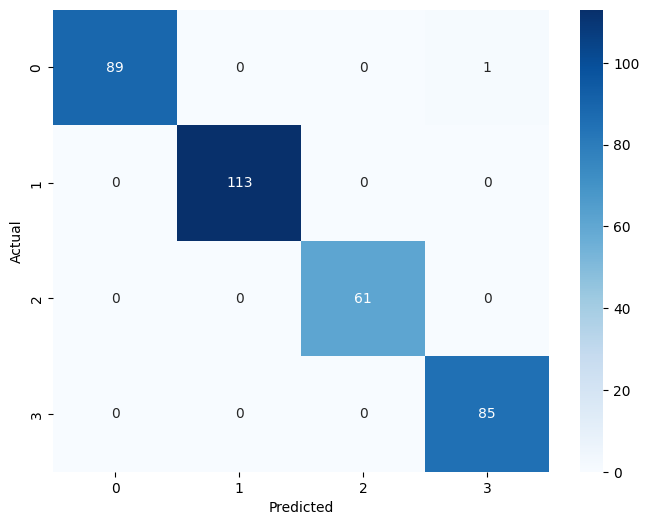

In [15]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
y_pred_train = model.predict(X_train_vectorized)

print("Accuracy:", accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))


Accuracy: 0.998406374501992
              precision    recall  f1-score   support

       cable       1.00      1.00      1.00       361
       fuses       1.00      1.00      1.00       353
    lighting       1.00      1.00      1.00       239
      others       0.99      1.00      1.00       302

    accuracy                           1.00      1255
   macro avg       1.00      1.00      1.00      1255
weighted avg       1.00      1.00      1.00      1255

[[360   0   0   1]
 [  0 352   0   1]
 [  0   0 239   0]
 [  0   0   0 302]]


In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_vectorized, y_train)

RandomForestClassifier()

In [18]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = model.predict(X_test_vectorized)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.997134670487106
              precision    recall  f1-score   support

       cable       1.00      1.00      1.00        90
       fuses       1.00      0.99      1.00       113
    lighting       1.00      1.00      1.00        61
      others       0.99      1.00      0.99        85

    accuracy                           1.00       349
   macro avg       1.00      1.00      1.00       349
weighted avg       1.00      1.00      1.00       349

[[ 90   0   0   0]
 [  0 112   0   1]
 [  0   0  61   0]
 [  0   0   0  85]]


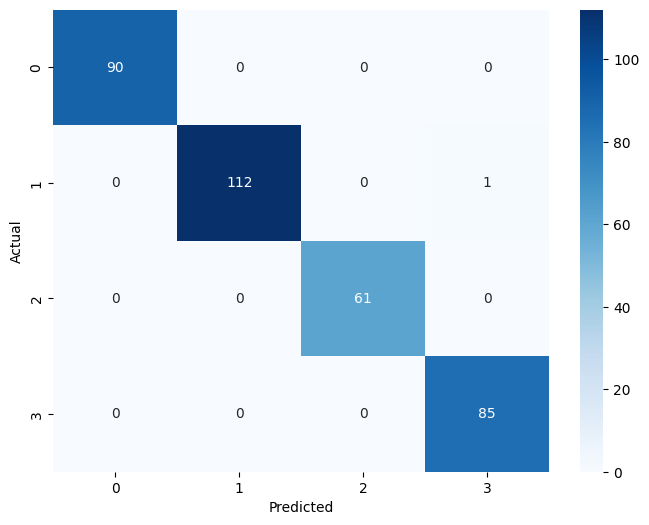

In [19]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [20]:
y_pred_train = model.predict(X_train_vectorized)
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))


Accuracy: 1.0
              precision    recall  f1-score   support

       cable       1.00      1.00      1.00       361
       fuses       1.00      1.00      1.00       353
    lighting       1.00      1.00      1.00       239
      others       1.00      1.00      1.00       302

    accuracy                           1.00      1255
   macro avg       1.00      1.00      1.00      1255
weighted avg       1.00      1.00      1.00      1255

[[361   0   0   0]
 [  0 353   0   0]
 [  0   0 239   0]
 [  0   0   0 302]]
